### <center>Predict Loan Eligibility for Dream Housing Finance company</center>

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

### Data Dictionary:

Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

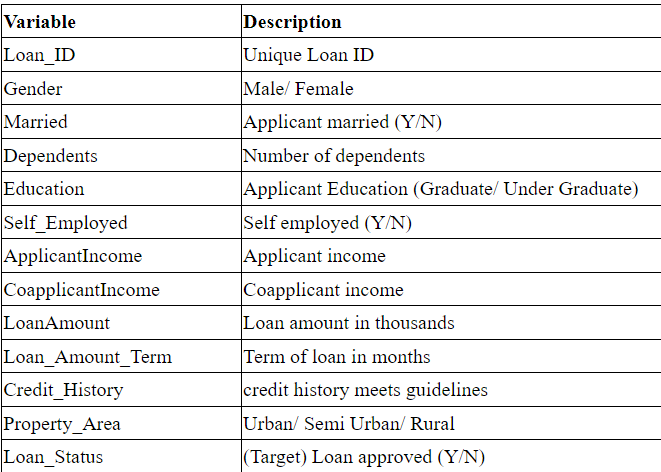

Test file: CSV containing the customer information for whom loan eligibility is to be predicted

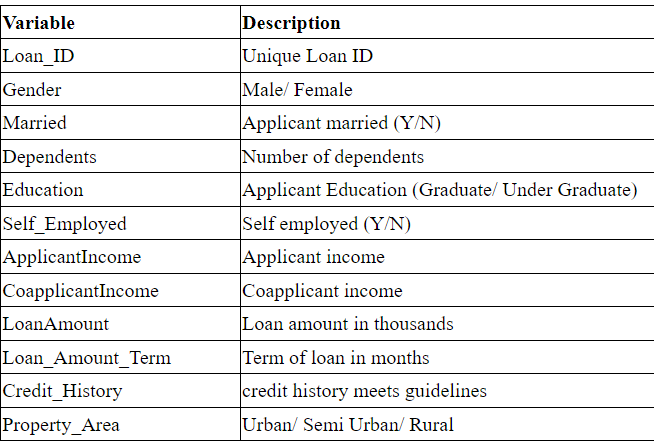

In [338]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

In [339]:
# read the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [340]:
# check dimensions of the data
print("train data:", train.shape)
print('test data:', test.shape)

train data: (614, 13)
test data: (367, 12)


In [341]:
# first 5 records
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [342]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [343]:
# check datatypes
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [344]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [345]:
# descriptive statistics
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [346]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [347]:
# data summary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [348]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


First we will drop the Loan_ID column as it is not necessary for our analysis.

In [349]:
train = train.drop(['Loan_ID'], axis=1)
test = test.drop(['Loan_ID'], axis=1)

In [350]:
# check for null/missing values
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [351]:
# create an instance for object imputer & numeric imputer
imputer_object = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_numeric = SimpleImputer(missing_values=np.nan, strategy='median')

In [352]:
# object columns
object_cols = ["Gender", "Married", "Dependents", "Self_Employed", "Loan_Amount_Term", "Credit_History"]

In [353]:
# select data from train
object_data = train[object_cols]

In [354]:
# apply object imputer
object_data = imputer_object.fit_transform(object_data)

In [355]:
# apply numeric imputer
train['LoanAmount'] = imputer_numeric.fit_transform(train[['LoanAmount']])

In [356]:
# drop unnecessary columns
train = train.drop(object_cols, axis=1)

In [357]:
# create dataframe
object_data = pd.DataFrame(object_data,columns=["Gender", "Married", "Dependents", "Self_Employed", "Loan_Amount_Term", "Credit_History"])

In [358]:
# check records present in data
object_data.head()

,Gender,Married,Dependents,Self_Employed,Loan_Amount_Term,Credit_History
0,Male,No,0,No,360.0,1.0
1,Male,Yes,1,No,360.0,1.0
2,Male,Yes,0,Yes,360.0,1.0
3,Male,Yes,0,No,360.0,1.0
4,Male,No,0,No,360.0,1.0


In [359]:
# training data
training_data = pd.concat([train, object_data], axis=1)

In [360]:
# check for null/missing values
training_data.isnull().sum()

Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Property_Area        0
Loan_Status          0
Gender               0
Married              0
Dependents           0
Self_Employed        0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [361]:
# check for duplicated records
training_data.duplicated().sum()

0

In [362]:
training_data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status,Gender,Married,Dependents,Self_Employed,Loan_Amount_Term,Credit_History
0,Graduate,5849,0.0,128.0,Urban,Y,Male,No,0,No,360.0,1.0
1,Graduate,4583,1508.0,128.0,Rural,N,Male,Yes,1,No,360.0,1.0
2,Graduate,3000,0.0,66.0,Urban,Y,Male,Yes,0,Yes,360.0,1.0
3,Not Graduate,2583,2358.0,120.0,Urban,Y,Male,Yes,0,No,360.0,1.0
4,Graduate,6000,0.0,141.0,Urban,Y,Male,No,0,No,360.0,1.0


In [363]:
# concise summary
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Property_Area      614 non-null    object 
 5   Loan_Status        614 non-null    object 
 6   Gender             614 non-null    object 
 7   Married            614 non-null    object 
 8   Dependents         614 non-null    object 
 9   Self_Employed      614 non-null    object 
 10  Loan_Amount_Term   614 non-null    object 
 11  Credit_History     614 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 57.7+ KB


In [364]:
# check for null/missing values
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [365]:
# object columns in test data
object_cols_test = ['Gender', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

In [366]:
# select data from test
object_cols_test = test[object_cols_test]

In [367]:
# check records in data
object_cols_test

,Gender,Dependents,Self_Employed,Credit_History,Loan_Amount_Term
0,Male,0,No,1.0,360.0
1,Male,1,No,1.0,360.0
2,Male,2,No,1.0,360.0
3,Male,2,No,NaN,360.0
4,Male,0,No,1.0,360.0
...,...,...,...,...,...
362,Male,3+,Yes,1.0,360.0
363,Male,0,No,1.0,360.0
364,Male,0,No,NaN,360.0
365,Male,0,No,1.0,360.0


In [368]:
# apply object imputer
object_cols_test = imputer_object.fit_transform(object_cols_test)

In [369]:
# create dataframe
object_cols_test = pd.DataFrame(object_cols_test, columns=['Gender', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term'])

# check records in the data
object_cols_test

,Gender,Dependents,Self_Employed,Credit_History,Loan_Amount_Term
0,Male,0,No,1.0,360.0
1,Male,1,No,1.0,360.0
2,Male,2,No,1.0,360.0
3,Male,2,No,1.0,360.0
4,Male,0,No,1.0,360.0
...,...,...,...,...,...
362,Male,3+,Yes,1.0,360.0
363,Male,0,No,1.0,360.0
364,Male,0,No,1.0,360.0
365,Male,0,No,1.0,360.0


In [370]:
# drop unnecessary columns
test = test.drop(object_cols_test, axis=1)
test

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area
0,Yes,Graduate,5720,0,110.0,Urban
1,Yes,Graduate,3076,1500,126.0,Urban
2,Yes,Graduate,5000,1800,208.0,Urban
3,Yes,Graduate,2340,2546,100.0,Urban
4,No,Not Graduate,3276,0,78.0,Urban
...,...,...,...,...,...,...
362,Yes,Not Graduate,4009,1777,113.0,Urban
363,Yes,Graduate,4158,709,115.0,Urban
364,No,Graduate,3250,1993,126.0,Semiurban
365,Yes,Graduate,5000,2393,158.0,Rural


In [371]:
# apply numeric imputer
test['LoanAmount'] = imputer_numeric.fit_transform(test[['LoanAmount']])

In [372]:
# testing data
testing_data = pd.concat([test, object_cols_test], axis=1)

In [373]:
# check for null/missing values
testing_data.isnull().sum()

Married              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Property_Area        0
Gender               0
Dependents           0
Self_Employed        0
Credit_History       0
Loan_Amount_Term     0
dtype: int64

In [374]:
# check for duplicate records
testing_data.duplicated().sum()

1

In [375]:
# drop duplicates
testing_data = testing_data.drop_duplicates()

In [376]:
# check for duplicate records
testing_data.duplicated().sum()

0

In [377]:
testing_data.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Gender,Dependents,Self_Employed,Credit_History,Loan_Amount_Term
0,Yes,Graduate,5720,0,110.0,Urban,Male,0,No,1.0,360.0
1,Yes,Graduate,3076,1500,126.0,Urban,Male,1,No,1.0,360.0
2,Yes,Graduate,5000,1800,208.0,Urban,Male,2,No,1.0,360.0
3,Yes,Graduate,2340,2546,100.0,Urban,Male,2,No,1.0,360.0
4,No,Not Graduate,3276,0,78.0,Urban,Male,0,No,1.0,360.0


In [378]:
# concise summary
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            366 non-null    object 
 1   Education          366 non-null    object 
 2   ApplicantIncome    366 non-null    int64  
 3   CoapplicantIncome  366 non-null    int64  
 4   LoanAmount         366 non-null    float64
 5   Property_Area      366 non-null    object 
 6   Gender             366 non-null    object 
 7   Dependents         366 non-null    object 
 8   Self_Employed      366 non-null    object 
 9   Credit_History     366 non-null    object 
 10  Loan_Amount_Term   366 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 34.3+ KB


In [379]:
# unique values in the data
def unique_values(data):
    for i in data.columns:
        if data[i].dtype == "O":
            print(i, data[i].unique())

In [380]:
unique_values(training_data)

Education ['Graduate' 'Not Graduate']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']
Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Self_Employed ['No' 'Yes']
Loan_Amount_Term [360.0 120.0 240.0 180.0 60.0 300.0 480.0 36.0 84.0 12.0]
Credit_History [1.0 0.0]


In [381]:
unique_values(testing_data)

Married ['Yes' 'No']
Education ['Graduate' 'Not Graduate']
Property_Area ['Urban' 'Semiurban' 'Rural']
Gender ['Male' 'Female']
Dependents ['0' '1' '2' '3+']
Self_Employed ['No' 'Yes']
Credit_History [1.0 0.0]
Loan_Amount_Term [360.0 240.0 180.0 60.0 480.0 84.0 12.0 300.0 350.0 36.0 120.0 6.0]


#### Data Visualization

In [382]:
# First we will map the values in Credit_History to [Yes, No]
training_data['Credit_History'] = training_data['Credit_History'].astype('int')
training_data['Credit_History'] = training_data['Credit_History'].map({1:'Yes', 0:'No'})
training_data['Credit_History'].head(10)

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
5    Yes
6    Yes
7     No
8    Yes
9    Yes
Name: Credit_History, dtype: object

In [383]:
testing_data['Credit_History'] = testing_data['Credit_History'].astype('int')
testing_data['Credit_History'] = testing_data['Credit_History'].map({1:'Yes', 0:'No'})
testing_data['Credit_History'].head(10)

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
5    Yes
6    Yes
7     No
8    Yes
9    Yes
Name: Credit_History, dtype: object

In [384]:
training_data['Loan_Amount_Term'] = training_data['Loan_Amount_Term'].astype('int')
testing_data['Loan_Amount_Term'] = testing_data['Loan_Amount_Term'].astype('int')

In [385]:
# How many people in the data are married ?
training_data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [386]:
# Education : How many people are graduated and not graduated ?
training_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [387]:
# How many different property area that people live in ?
training_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

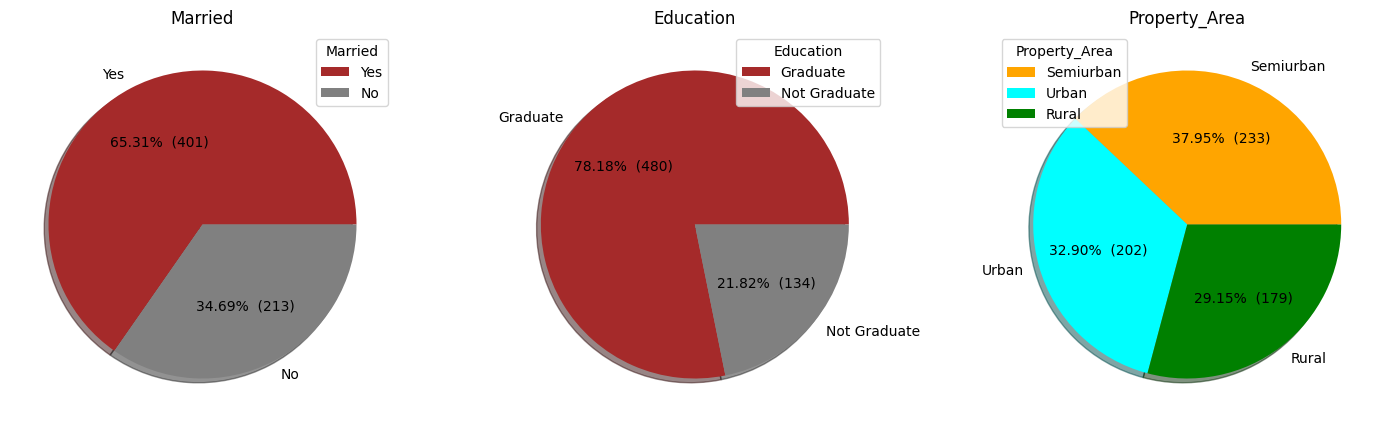

In [388]:
fig = plt.figure(figsize=(18, 5))

ax1 = plt.subplot2grid((1,3), (0,0))

dataMarried = training_data['Married'].value_counts().values
labelsMarried = training_data['Married'].value_counts().index

plt.pie(x=dataMarried, labels=labelsMarried, 
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataMarried)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelsMarried, loc='upper right', title='Married')
plt.title("Married")

ax2 = plt.subplot2grid((1,3), (0,1))

dataEducation = training_data['Education'].value_counts().values
labelsEducation = training_data['Education'].value_counts().index

plt.pie(x=dataEducation, labels=labelsEducation, 
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataEducation)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelsEducation, loc='upper right', title='Education')
plt.title("Education")

ax3 = plt.subplot2grid((1,3), (0,2))

dataProperty_Area = training_data['Property_Area'].value_counts().values
labelsProperty_Area = training_data['Property_Area'].value_counts().index

plt.pie(x=dataProperty_Area, labels=labelsProperty_Area, 
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataProperty_Area)/100), colors=['orange','cyan', 'green'], shadow=True)
plt.legend(labelsProperty_Area, loc='upper left', title='Property_Area')
plt.title("Property_Area")

plt.show()

#### Insights:
 - 65% people are married.
 - 78% are graduates.
 - 38% live in Semi-Urban, 33% in Urban and 29% live in Rural areas.

In [389]:
# What is the distribution of gender in the data ?
training_data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [390]:
# How many people are self employed ?
training_data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [391]:
# How many people have a Credit History ?
training_data['Credit_History'].value_counts()

Yes    525
No      89
Name: Credit_History, dtype: int64

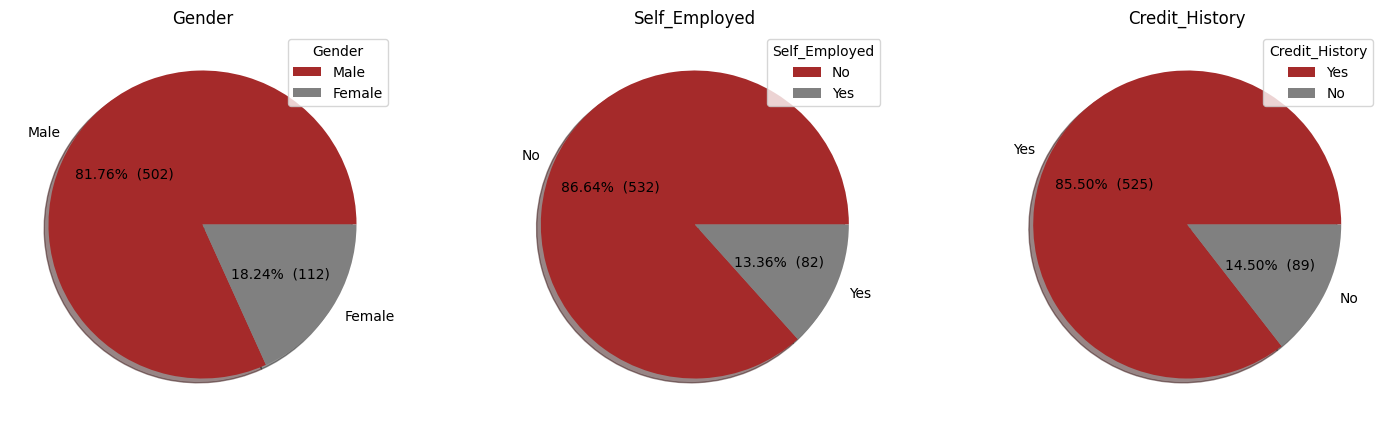

In [392]:
fig = plt.figure(figsize=(18, 5))

ax1 = plt.subplot2grid((1,3), (0,0))

dataGender= training_data['Gender'].value_counts().values
labelsGender = training_data['Gender'].value_counts().index

plt.pie(x=dataGender, labels=labelsGender, 
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataGender)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelsGender, loc='upper right', title='Gender')
plt.title("Gender")

ax2 = plt.subplot2grid((1,3), (0,1))

dataSelf_Employed = training_data['Self_Employed'].value_counts().values
labelsSelf_Employed = training_data['Self_Employed'].value_counts().index

plt.pie(x=dataSelf_Employed, labels=labelsSelf_Employed, 
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataSelf_Employed)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelsSelf_Employed, loc='upper right', title='Self_Employed')
plt.title("Self_Employed")

ax3 = plt.subplot2grid((1,3), (0,2))

dataCredit_History = training_data['Credit_History'].value_counts().values
labelsCredit_History = ['Yes', 'No']

plt.pie(x=dataCredit_History, labels=labelsCredit_History, 
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataCredit_History)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelsCredit_History, loc='upper right', title='Credit_History')
plt.title("Credit_History")

plt.show()

#### Insights:
 - 82% people are Males and rest are females.
 - 13% people are self employed and rest are working professionals.
 - 85.5% people have a Credit History.

In [393]:
# How many people were approved loan ?
training_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [394]:
# How many people have dependents and how many dependents they have ?
training_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [395]:
# What is the Loan amount term that people have preferrd most ?
training_data['Loan_Amount_Term'].value_counts()

360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64

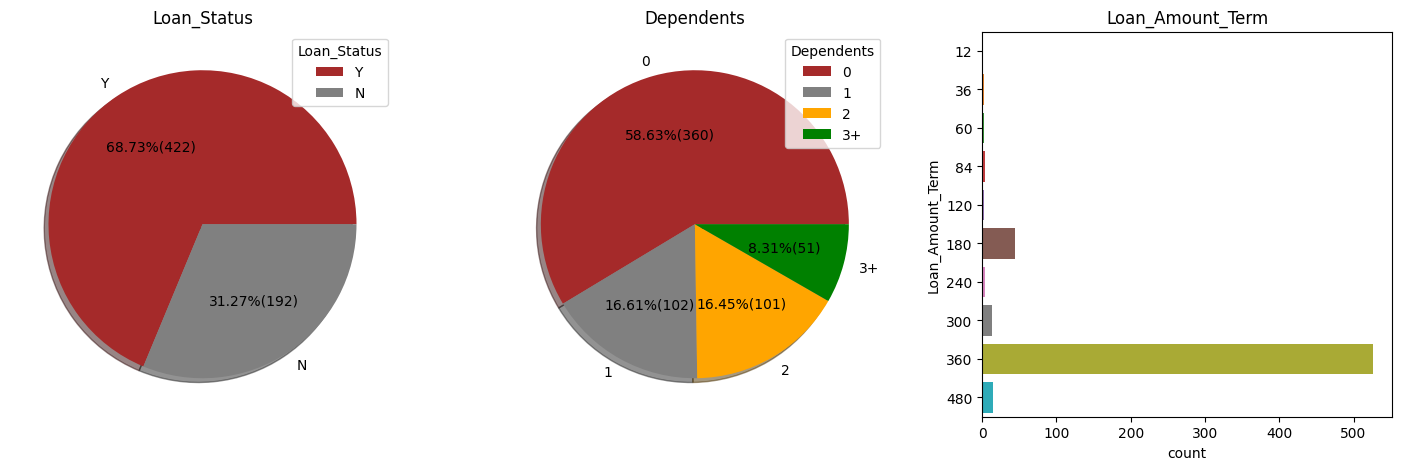

In [396]:
fig = plt.figure(figsize=(18, 5))

ax1 = plt.subplot2grid((1,3), (0,0))

dataLoan_Status= training_data['Loan_Status'].value_counts().values
labelsLoan_Status = training_data['Loan_Status'].value_counts().index

plt.pie(x=dataLoan_Status, labels=labelsLoan_Status, 
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataLoan_Status)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelsLoan_Status, loc='upper right', title='Loan_Status')
plt.title("Loan_Status")

ax2 = plt.subplot2grid((1,3), (0,1))

dataDependents = training_data['Dependents'].value_counts().values
labelsDependents = training_data['Dependents'].value_counts().index

plt.pie(x=dataDependents, labels=labelsDependents, 
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataDependents)/100), colors=['brown','gray', 'orange', 'green'], shadow=True)
plt.legend(labelsDependents, loc='upper right', title='Dependents')
plt.title("Dependents")

ax3 = plt.subplot2grid((1,3), (0,2))
sns.countplot(y='Loan_Amount_Term', data=training_data)
plt.title("Loan_Amount_Term")

plt.show()

#### Insights:
 - About 69% people have their loan approved.
 - About 59% people have no dependents, 17% people have 1 dependent, 16% people have 2 dependents and 8% people have 3+ dependents.
 - The Loan Amount Term that people have most preferred is 360 months.

In [397]:
# find out numerical columns in data
def numerical_cols(data):
    for i in data.columns:
        if data[i].dtype!='O':
            print(i) 

In [398]:
# numerical columns in training data
numerical_cols(training_data)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term


In [399]:
# Descriptive statistics of numerical columns
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


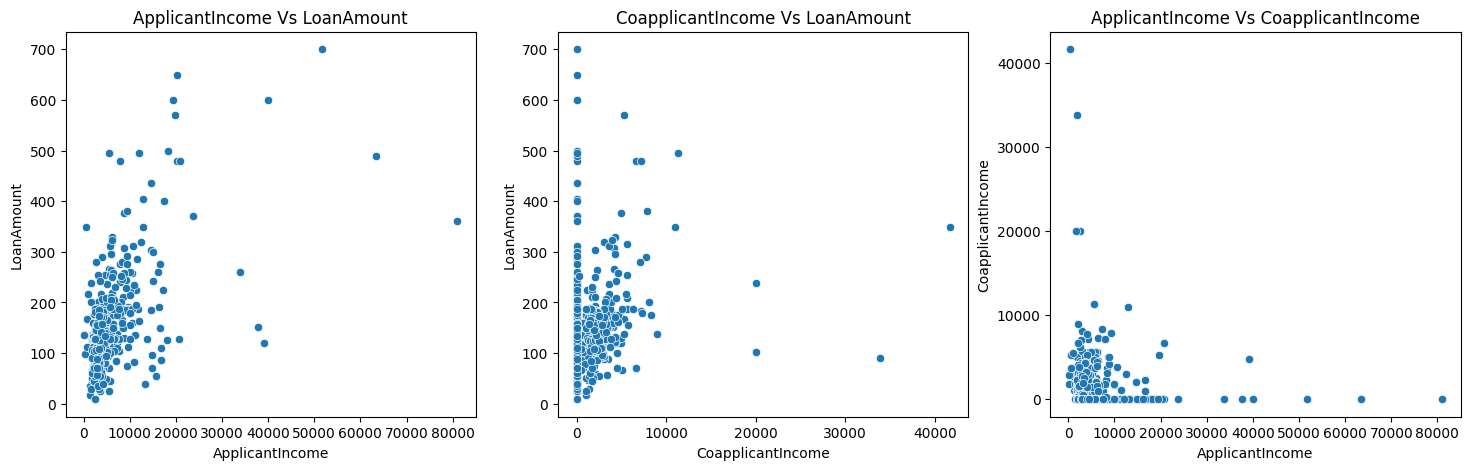

In [400]:
# Scatterplots
fig = plt.figure(figsize=(18, 5))

ax1 = plt.subplot2grid((1,3), (0,0))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=training_data)
plt.title("ApplicantIncome Vs LoanAmount")

ax2 = plt.subplot2grid((1,3), (0,1))
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=training_data)
plt.title("CoapplicantIncome Vs LoanAmount")

ax3 = plt.subplot2grid((1,3), (0,2))
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=training_data)
plt.title("ApplicantIncome Vs CoapplicantIncome")

plt.show()

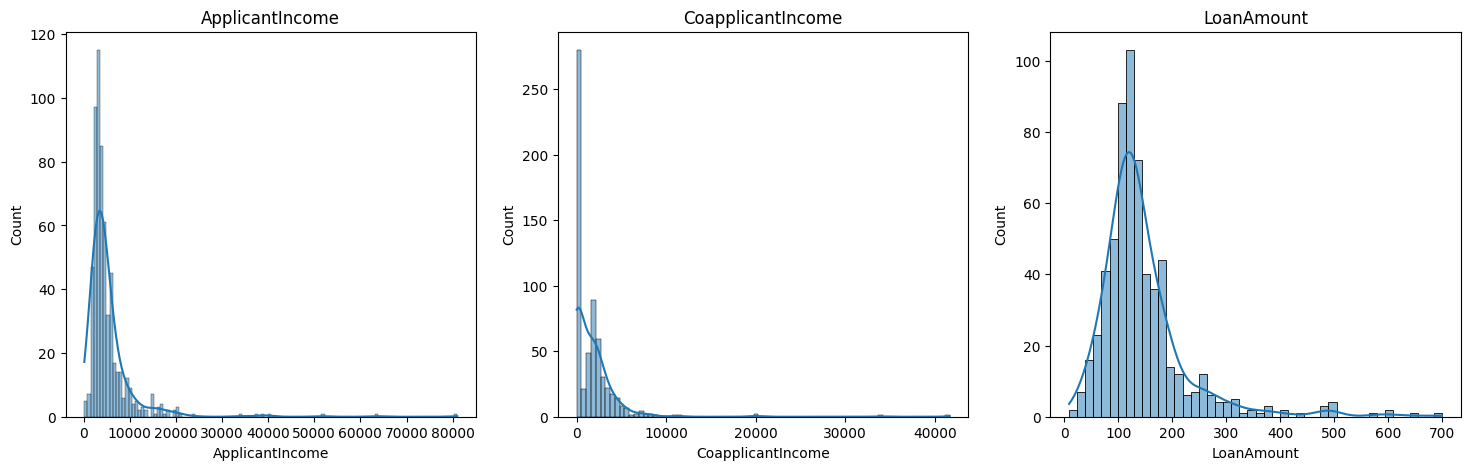

In [401]:
# Histograms
fig = plt.figure(figsize=(18, 5))

ax1 = plt.subplot2grid((1,3), (0,0))
sns.histplot(x='ApplicantIncome', data=training_data, kde=True)
plt.title("ApplicantIncome")

ax2 = plt.subplot2grid((1,3), (0,1))
sns.histplot(x='CoapplicantIncome', data=training_data, kde=True)
plt.title("CoapplicantIncome")

ax3 = plt.subplot2grid((1,3), (0,2))
sns.histplot(x='LoanAmount', data=training_data, kde=True)
plt.title("LoanAmount")

plt.show()

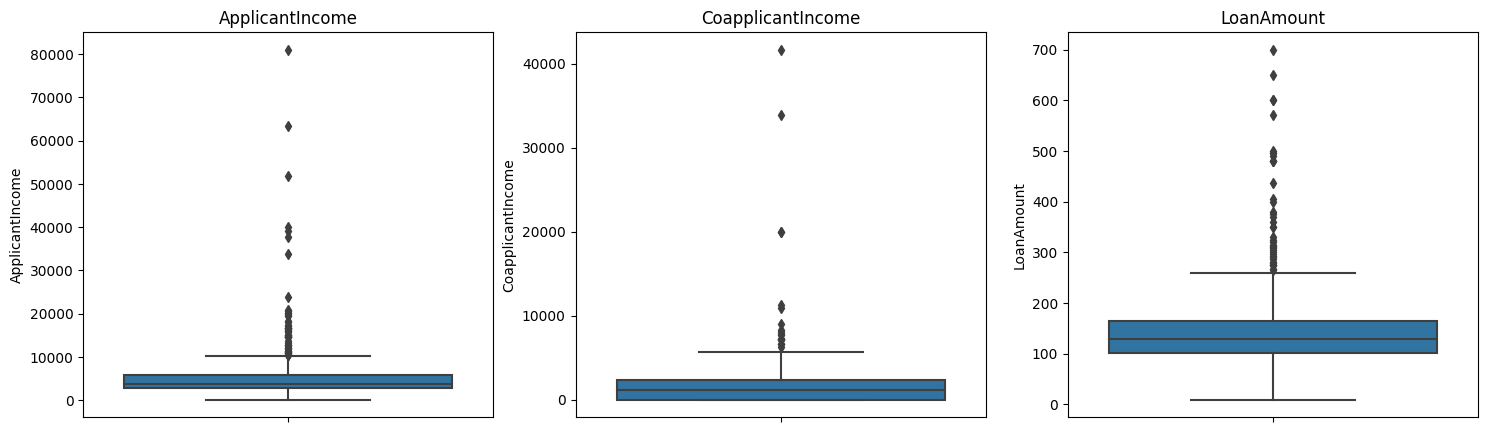

In [402]:
# Boxplots
fig = plt.figure(figsize=(18, 5))

ax1 = plt.subplot2grid((1,3), (0,0))
sns.boxplot(y='ApplicantIncome', data=training_data, orient='v')
plt.title("ApplicantIncome")

ax2 = plt.subplot2grid((1,3), (0,1))
sns.boxplot(y='CoapplicantIncome', data=training_data, orient='v')
plt.title("CoapplicantIncome")

ax3 = plt.subplot2grid((1,3), (0,2))
sns.boxplot(y='LoanAmount', data=training_data, orient='v')
plt.title("LoanAmount")

plt.show()

In [403]:
training_data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status,Gender,Married,Dependents,Self_Employed,Loan_Amount_Term,Credit_History
0,Graduate,5849,0.0,128.0,Urban,Y,Male,No,0,No,360,Yes
1,Graduate,4583,1508.0,128.0,Rural,N,Male,Yes,1,No,360,Yes
2,Graduate,3000,0.0,66.0,Urban,Y,Male,Yes,0,Yes,360,Yes
3,Not Graduate,2583,2358.0,120.0,Urban,Y,Male,Yes,0,No,360,Yes
4,Graduate,6000,0.0,141.0,Urban,Y,Male,No,0,No,360,Yes


In [404]:
# Genderwise Graduates and Non Graduates
training_data.groupby(['Gender', 'Education'])['Loan_Status'].count().divide(6.14).round(2).reset_index().rename(
    columns={'Loan_Status':'% Counts'})

,Gender,Education,% Counts
0,Female,Graduate,14.98
1,Female,Not Graduate,3.26
2,Male,Graduate,63.19
3,Male,Not Graduate,18.57


In [405]:
# Genderwise Married people counts
training_data.groupby(['Gender', 'Married'])['Loan_Status'].count().divide(6.14).round(2).reset_index().rename(
    columns={'Loan_Status':'% Counts'})

,Gender,Married,% Counts
0,Female,No,13.03
1,Female,Yes,5.21
2,Male,No,21.66
3,Male,Yes,60.10


In [406]:
# Genderwise Self Employed people counts
training_data.groupby(['Gender', 'Self_Employed'])['Loan_Status'].count().divide(6.14).round(2).reset_index().rename(
    columns={'Loan_Status':'% Counts'})

,Gender,Self_Employed,% Counts
0,Female,No,15.80
1,Female,Yes,2.44
2,Male,No,70.85
3,Male,Yes,10.91


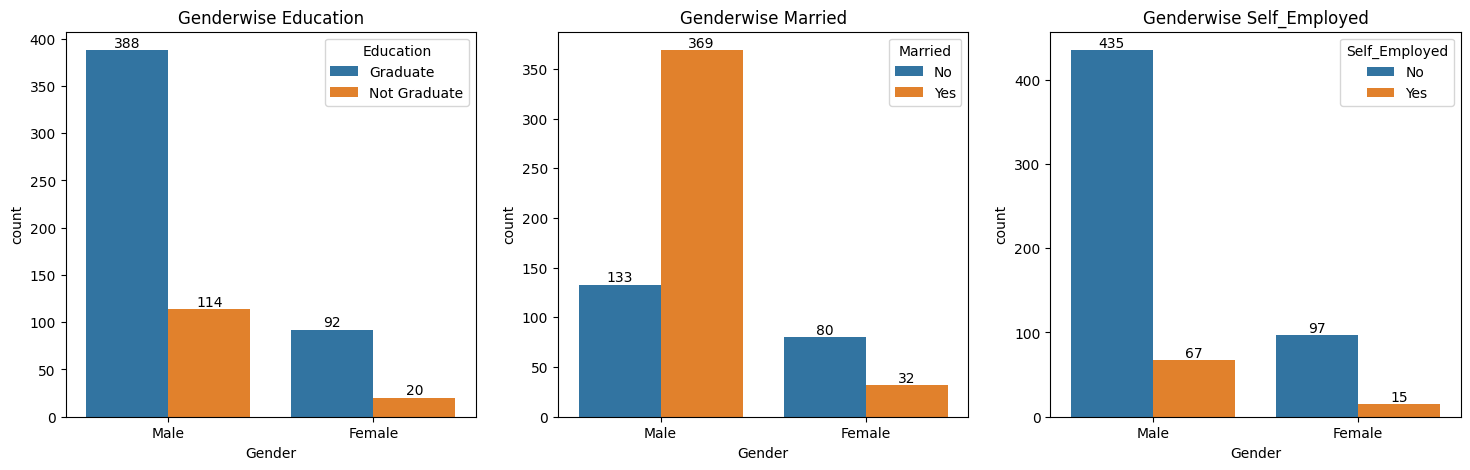

In [407]:
# Countplots
fig = plt.figure(figsize=(18, 5))

ax1 = plt.subplot2grid((1,3), (0,0))
sns.countplot(x='Gender', hue='Education' , data=training_data)
for i in range(len(training_data['Education'].unique())):
    ax1.bar_label(ax1.containers[i], label_type='edge')
plt.title("Genderwise Education")

ax2 = plt.subplot2grid((1,3), (0,1))
sns.countplot(x='Gender', hue='Married' , data=training_data)
for i in range(len(training_data['Married'].unique())):
    ax2.bar_label(ax2.containers[i], label_type='edge')
plt.title("Genderwise Married")

ax3 = plt.subplot2grid((1,3), (0,2))
sns.countplot(x='Gender', hue='Self_Employed' , data=training_data)
for i in range(len(training_data['Self_Employed'].unique())):
    ax3.bar_label(ax3.containers[i], label_type='edge')
plt.title("Genderwise Self_Employed")

plt.show()

#### Insights
 - There are 388(63%) Males and 92(15%) Females who are graduates and 114(19%) Males and 20(3%) Females who are Non-Graduates.
 - There are 369(60%) Males and 32(5%) Females who are Married and 133(22%) Males and 80(13%) Females who are Bachelors.
 - There are 67(11%) Males and 15(2%) Females who are Self Employed and 435(71%) Males and 97(16%) Females who are working professionals.

In [408]:
# Genderwise Property Area 
training_data.groupby(['Gender', 'Property_Area'])['Loan_Status'].count().divide(6.14).round(2).reset_index().rename(
    columns={'Loan_Status':'% Counts'})

,Gender,Property_Area,% Counts
0,Female,Rural,3.91
1,Female,Semiurban,8.96
2,Female,Urban,5.37
3,Male,Rural,25.24
4,Male,Semiurban,28.99
5,Male,Urban,27.52


In [409]:
# Genderwise Number of Dependents
training_data.groupby(['Gender', 'Dependents'])['Loan_Status'].count().divide(6.14).round(2).reset_index().rename(
    columns={'Loan_Status':'% Counts'})

,Gender,Dependents,% Counts
0,Female,0,13.52
1,Female,1,3.09
2,Female,2,1.14
3,Female,3+,0.49
4,Male,0,45.11
5,Male,1,13.52
6,Male,2,15.31
7,Male,3+,7.82


In [410]:
# Genderwise Credit History
training_data.groupby(['Gender', 'Credit_History'])['Loan_Status'].count().divide(6.14).round(2).reset_index().rename(
    columns={'Loan_Status':'% Counts'})

,Gender,Credit_History,% Counts
0,Female,No,2.77
1,Female,Yes,15.47
2,Male,No,11.73
3,Male,Yes,70.03


In [411]:
# Genderwise Loan Status
training_data.groupby(['Gender', 'Loan_Status'])['Credit_History'].count().divide(6.14).round(2).reset_index().rename(
    columns={'Credit_History':'% Counts'})

,Gender,Loan_Status,% Counts
0,Female,N,6.03
1,Female,Y,12.21
2,Male,N,25.24
3,Male,Y,56.51


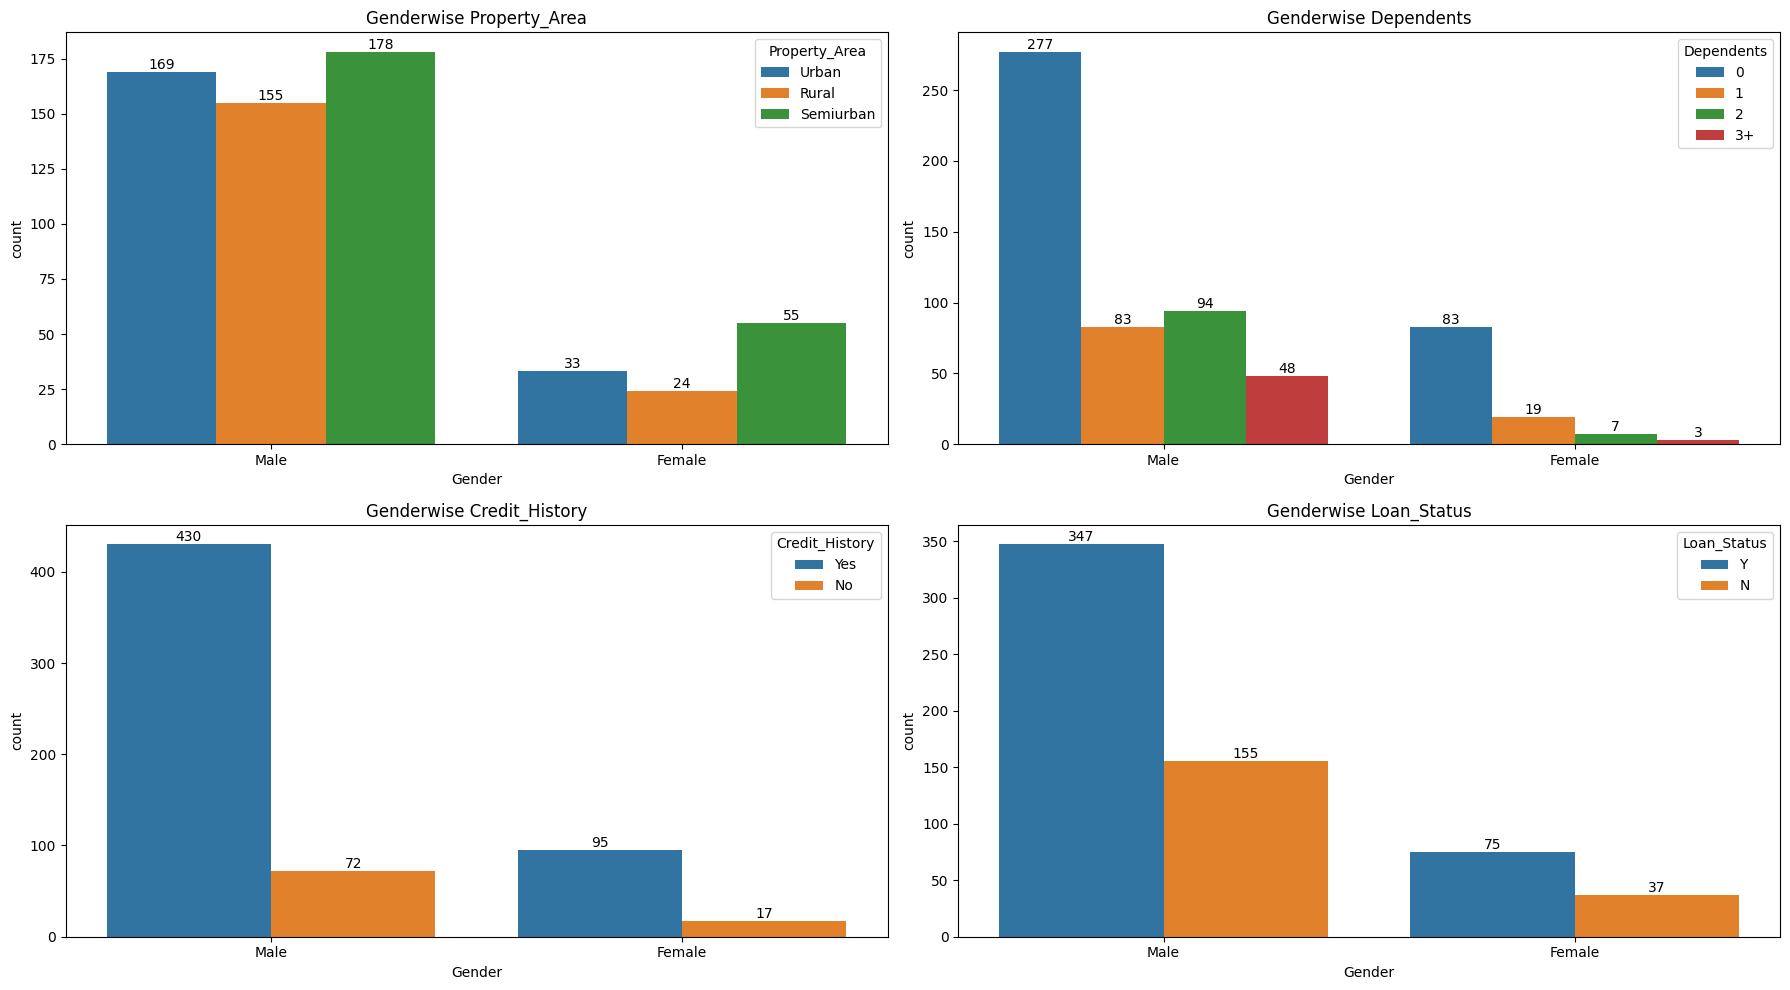

In [412]:
# Countplots
fig = plt.figure(figsize=(18, 10))

ax1 = plt.subplot2grid((2,2), (0,0))
sns.countplot(x='Gender', hue='Property_Area' , data=training_data)
for i in range(len(training_data['Property_Area'].unique())):
    ax1.bar_label(ax1.containers[i], label_type='edge')
plt.title("Genderwise Property_Area")

ax2 = plt.subplot2grid((2,2), (0,1))
sns.countplot(x='Gender', hue='Dependents' , data=training_data)
for i in range(len(training_data['Dependents'].unique())):
    ax2.bar_label(ax2.containers[i], label_type='edge')
plt.title("Genderwise Dependents")

ax3 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x='Gender', hue='Credit_History' , data=training_data)
for i in range(len(training_data['Credit_History'].unique())):
    ax3.bar_label(ax3.containers[i], label_type='edge')
plt.title("Genderwise Credit_History")

ax4 = plt.subplot2grid((2,2), (1,1))
sns.countplot(x='Gender', hue='Loan_Status' , data=training_data)
for i in range(len(training_data['Loan_Status'].unique())):
    ax4.bar_label(ax4.containers[i], label_type='edge')
plt.title("Genderwise Loan_Status")

plt.tight_layout()
plt.show()

#### Insights:
 - There are 169(28%) Males in Urban, 178(29%) in Semiurban and 155(25%) in Rural Areas whereas there are 33(5%) Females in Urban, 55(9%) in Semiurban and 24(4%) in Rural Areas.
 - There are 277(45%) Males who do not have any dependents, 83(14%) have 1 dependent, 94(15%) have 2 dependents, 48(8%) have 3+ dependents and there are 83(14%) Females who do not have any dependents, 19(3%) have 1 dependent, 7(1%) have 2 dependents, 3(0.49%) have 3+ dependents.
 - There are 430(70%) Males and 95(15%) Females who have a Credit History and 72(12%) Males and 17(3%) Females do not have a Credit History.
 - There are 347(57%) Males and 75(12%) Females with Loan Status Approved and 155(25%) Males and 37(12%) Females with Loan Status Not Approved.

In [413]:
training_data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status,Gender,Married,Dependents,Self_Employed,Loan_Amount_Term,Credit_History
0,Graduate,5849,0.0,128.0,Urban,Y,Male,No,0,No,360,Yes
1,Graduate,4583,1508.0,128.0,Rural,N,Male,Yes,1,No,360,Yes
2,Graduate,3000,0.0,66.0,Urban,Y,Male,Yes,0,Yes,360,Yes
3,Not Graduate,2583,2358.0,120.0,Urban,Y,Male,Yes,0,No,360,Yes
4,Graduate,6000,0.0,141.0,Urban,Y,Male,No,0,No,360,Yes


In [414]:
# Most preferred Loan Amount Term
training_data.groupby(['Gender', 'Loan_Amount_Term'])['Dependents'].count().reset_index().rename(columns={'Dependents':'Counts'})

,Gender,Loan_Amount_Term,Counts
0,Female,36,1
1,Female,84,1
2,Female,180,3
3,Female,240,1
4,Female,300,1
5,Female,360,101
6,Female,480,4
7,Male,12,1
8,Male,36,1
9,Male,60,2


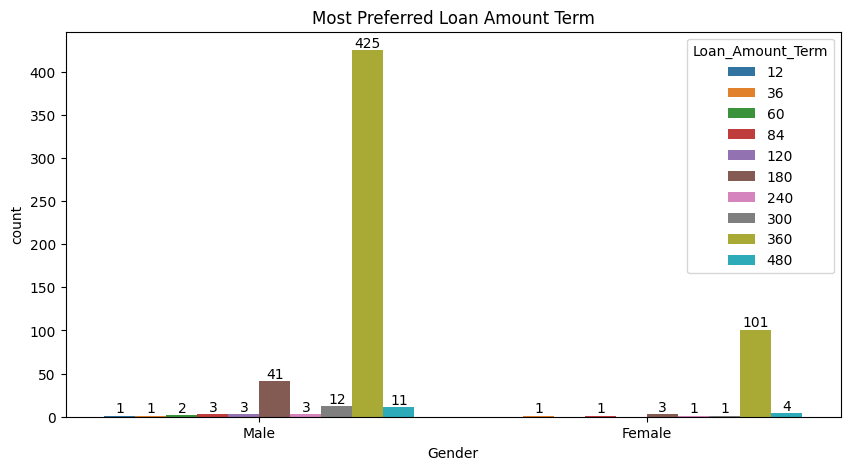

In [415]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot2grid((1,1), (0,0))
sns.countplot(x='Gender', hue='Loan_Amount_Term', data=training_data)
for i in range(len(training_data['Loan_Amount_Term'].unique())):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.title('Most Preferred Loan Amount Term')
plt.show()

#### Male and Female both prefer Loan Amount Term to be 360 months.

In [416]:
numerical_cols(training_data)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term


In [417]:
# Genderwise Applicant Income (Average)
Gender_Applicant_Income = training_data.groupby(['Gender'])['ApplicantIncome'].mean().round(0).reset_index()
Gender_Applicant_Income

,Gender,ApplicantIncome
0,Female,4643.0
1,Male,5573.0


In [418]:
# Genderwise CoApplicant Income (Average)
Gender_Coapplicant_Income = training_data.groupby(['Gender'])['CoapplicantIncome'].mean().round(0).reset_index()
Gender_Coapplicant_Income

,Gender,CoapplicantIncome
0,Female,1108.0
1,Male,1736.0


In [419]:
# Genderwise LoanAmount (Average)
Gender_LoanAmount = training_data.groupby(['Gender'])['LoanAmount'].mean().round(0).reset_index()
Gender_LoanAmount

,Gender,LoanAmount
0,Female,127.0
1,Male,150.0


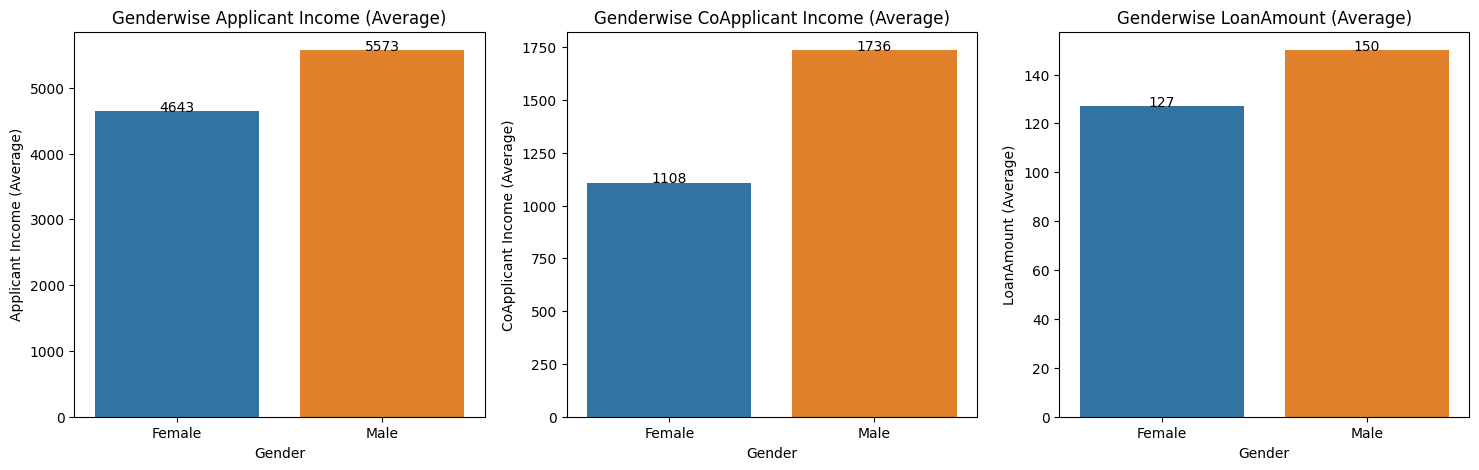

In [420]:
fig = plt.figure(figsize=(18, 5))
# function to add value labels
plt.subplot2grid((1,3), (0,0))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 
if __name__ == '__main__':
   
    # creating data on which bar chart will be plot
    x = Gender_Applicant_Income['Gender'].values
    y = Gender_Applicant_Income['ApplicantIncome'].values.astype('int')
     
    # setting figure size by using figure() function
    # plt.figure(figsize = (6, 5))
     
    # making the bar chart on the data
    sns.barplot(x=x, y=y)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("Genderwise Applicant Income (Average)")
     
    # giving X and Y labels
    plt.xlabel("Gender")
    plt.ylabel("Applicant Income (Average)")
    
plt.subplot2grid((1,3), (0,1))
     
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 
if __name__ == '__main__':
   
    # creating data on which bar chart will be plot
    x = Gender_Coapplicant_Income['Gender'].values
    y = Gender_Coapplicant_Income['CoapplicantIncome'].values.astype('int')
     
    # making the bar chart on the data
    sns.barplot(x=x, y=y)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("Genderwise CoApplicant Income (Average)")
     
    # giving X and Y labels
    plt.xlabel("Gender")
    plt.ylabel("CoApplicant Income (Average)")
    
plt.subplot2grid((1,3), (0,2))
     
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 
if __name__ == '__main__':
   
    # creating data on which bar chart will be plot
    x = Gender_LoanAmount['Gender'].values
    y = Gender_LoanAmount['LoanAmount'].values.astype('int')
     
    # making the bar chart on the data
    sns.barplot(x=x, y=y)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("Genderwise LoanAmount (Average)")
     
    # giving X and Y labels
    plt.xlabel("Gender")
    plt.ylabel("LoanAmount (Average)")
     
# visualizing the plot
plt.show()

#### Since our dataset has more records for Males than Females, the Average Appplicant Income, CoApplicant Income and Loan Amount are higher for Males than Females.

In [421]:
# Education and Loan Status
training_data.groupby(['Education', 'Loan_Status'])['Gender'].count().reset_index().rename(columns={'Gender':'Counts'})

,Education,Loan_Status,Counts
0,Graduate,N,140
1,Graduate,Y,340
2,Not Graduate,N,52
3,Not Graduate,Y,82


In [422]:
# Property Area and Loan Status
training_data.groupby(['Property_Area', 'Loan_Status'])['Gender'].count().reset_index().rename(columns={'Gender':'Counts'})

,Property_Area,Loan_Status,Counts
0,Rural,N,69
1,Rural,Y,110
2,Semiurban,N,54
3,Semiurban,Y,179
4,Urban,N,69
5,Urban,Y,133


In [423]:
# Dependents and Loan Status
training_data.groupby(['Dependents', 'Loan_Status'])['Gender'].count().reset_index().rename(columns={'Gender':'Counts'})

,Dependents,Loan_Status,Counts
0,0,N,113
1,0,Y,247
2,1,N,36
3,1,Y,66
4,2,N,25
5,2,Y,76
6,3+,N,18
7,3+,Y,33


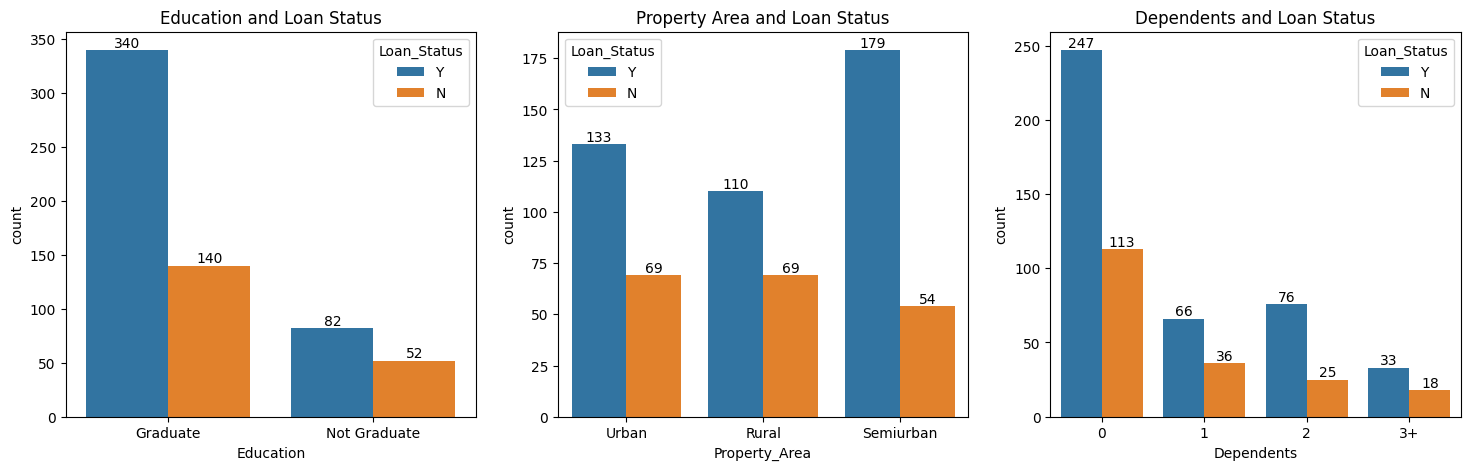

In [424]:
# Countplots
fig = plt.figure(figsize=(18, 5))

ax1 = plt.subplot2grid((1,3), (0,0))
sns.countplot(x='Education', hue='Loan_Status' , data=training_data)
for i in range(len(training_data['Loan_Status'].unique())):
    ax1.bar_label(ax1.containers[i], label_type='edge')
plt.title("Education and Loan Status")

ax2 = plt.subplot2grid((1,3), (0,1))
sns.countplot(x='Property_Area', hue='Loan_Status' , data=training_data)
for i in range(len(training_data['Loan_Status'].unique())):
    ax2.bar_label(ax2.containers[i], label_type='edge')
plt.title("Property Area and Loan Status")

ax3 = plt.subplot2grid((1,3), (0,2))
sns.countplot(x='Dependents', hue='Loan_Status' , data=training_data)
for i in range(len(training_data['Loan_Status'].unique())):
    ax3.bar_label(ax3.containers[i], label_type='edge')
plt.title("Dependents and Loan Status")

plt.show()

In [425]:
# Married and Loan Status
training_data.groupby(['Married', 'Loan_Status'])['Gender'].count().reset_index().rename(columns={'Gender':'Counts'})

,Married,Loan_Status,Counts
0,No,N,79
1,No,Y,134
2,Yes,N,113
3,Yes,Y,288


In [426]:
# Self_Employed and Loan Status
training_data.groupby(['Self_Employed', 'Loan_Status'])['Gender'].count().reset_index().rename(columns={'Gender':'Counts'})

,Self_Employed,Loan_Status,Counts
0,No,N,166
1,No,Y,366
2,Yes,N,26
3,Yes,Y,56


In [427]:
# Credit_History and Loan Status
training_data.groupby(['Credit_History', 'Loan_Status'])['Gender'].count().reset_index().rename(columns={'Gender':'Counts'})

,Credit_History,Loan_Status,Counts
0,No,N,82
1,No,Y,7
2,Yes,N,110
3,Yes,Y,415


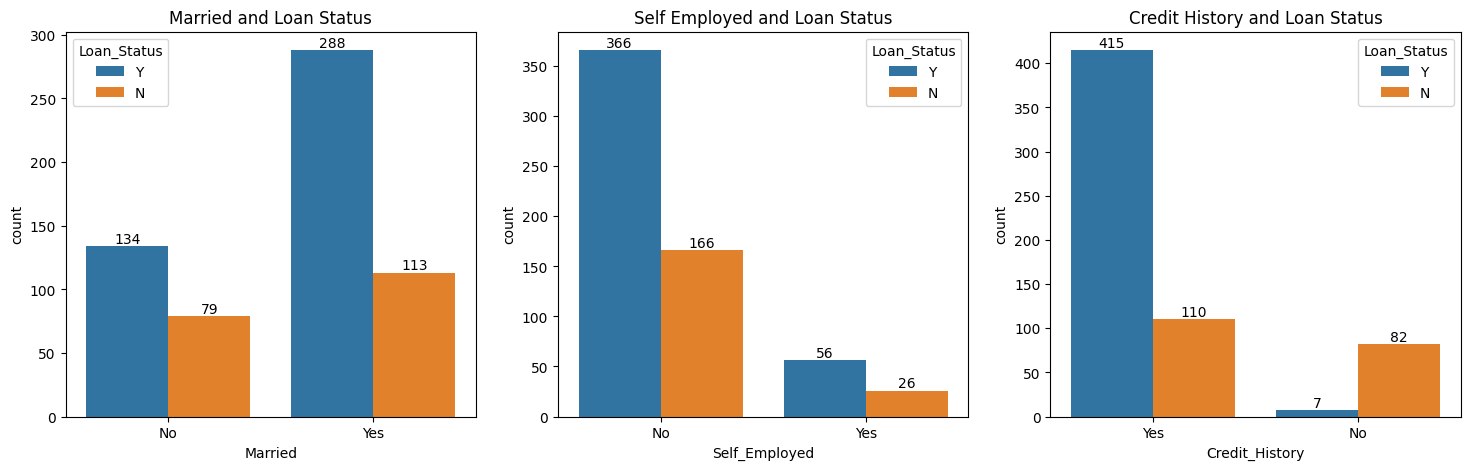

In [428]:
# Countplots
fig = plt.figure(figsize=(18, 5))

ax1 = plt.subplot2grid((1,3), (0,0))
sns.countplot(x='Married', hue='Loan_Status' , data=training_data)
for i in range(len(training_data['Loan_Status'].unique())):
    ax1.bar_label(ax1.containers[i], label_type='edge')
plt.title("Married and Loan Status")

ax2 = plt.subplot2grid((1,3), (0,1))
sns.countplot(x='Self_Employed', hue='Loan_Status' , data=training_data)
for i in range(len(training_data['Loan_Status'].unique())):
    ax2.bar_label(ax2.containers[i], label_type='edge')
plt.title("Self Employed and Loan Status")

ax3 = plt.subplot2grid((1,3), (0,2))
sns.countplot(x='Credit_History', hue='Loan_Status' , data=training_data)
for i in range(len(training_data['Loan_Status'].unique())):
    ax3.bar_label(ax3.containers[i], label_type='edge')
plt.title("Credit History and Loan Status")

plt.show()

In [429]:
numerical_cols(training_data)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term


In [430]:
# Average Applicant Income and Loan Status
LoanStatusApplicantIncome = training_data.groupby(['Loan_Status'])['ApplicantIncome'].mean().round(0).reset_index()
LoanStatusApplicantIncome

,Loan_Status,ApplicantIncome
0,N,5446.0
1,Y,5384.0


In [431]:
# Average CoApplicant Income and Loan Status
LoanStatusCoapplicantIncome = training_data.groupby(['Loan_Status'])['CoapplicantIncome'].mean().round(0).reset_index()
LoanStatusCoapplicantIncome

,Loan_Status,CoapplicantIncome
0,N,1878.0
1,Y,1505.0


In [432]:
# Average LoanAmount and Loan Status
LoanStatusLoanAmount = training_data.groupby(['Loan_Status'])['LoanAmount'].mean().round(0).reset_index()
LoanStatusLoanAmount

,Loan_Status,LoanAmount
0,N,150.0
1,Y,144.0


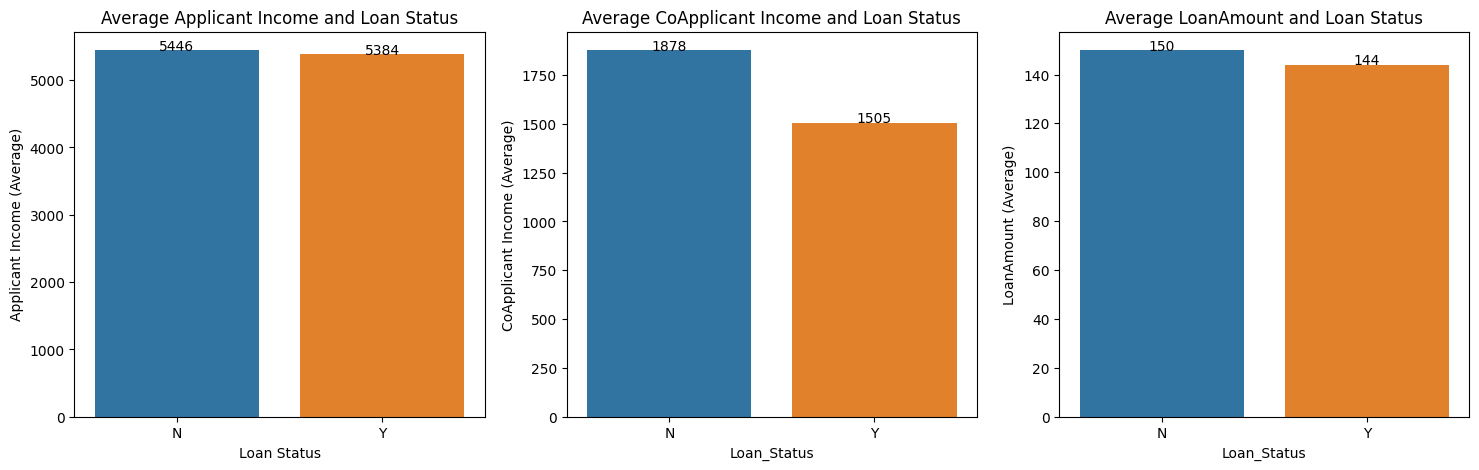

In [433]:
fig = plt.figure(figsize=(18, 5))
# function to add value labels
plt.subplot2grid((1,3), (0,0))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 
if __name__ == '__main__':
   
    # creating data on which bar chart will be plot
    x = LoanStatusApplicantIncome['Loan_Status'].values
    y = LoanStatusApplicantIncome['ApplicantIncome'].values.astype('int')
     
    # setting figure size by using figure() function
    # plt.figure(figsize = (6, 5))
     
    # making the bar chart on the data
    sns.barplot(x=x, y=y)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("Average Applicant Income and Loan Status")
     
    # giving X and Y labels
    plt.xlabel("Loan Status")
    plt.ylabel("Applicant Income (Average)")
    
plt.subplot2grid((1,3), (0,1))
     
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 
if __name__ == '__main__':
   
    # creating data on which bar chart will be plot
    x = LoanStatusCoapplicantIncome['Loan_Status'].values
    y = LoanStatusCoapplicantIncome['CoapplicantIncome'].values.astype('int')
     
    # making the bar chart on the data
    sns.barplot(x=x, y=y)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("Average CoApplicant Income and Loan Status")
     
    # giving X and Y labels
    plt.xlabel("Loan_Status")
    plt.ylabel("CoApplicant Income (Average)")
    
plt.subplot2grid((1,3), (0,2))
     
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 
if __name__ == '__main__':
   
    # creating data on which bar chart will be plot
    x = LoanStatusLoanAmount['Loan_Status'].values
    y = LoanStatusLoanAmount['LoanAmount'].values.astype('int')
     
    # making the bar chart on the data
    sns.barplot(x=x, y=y)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("Average LoanAmount and Loan Status")
     
    # giving X and Y labels
    plt.xlabel("Loan_Status")
    plt.ylabel("LoanAmount (Average)")
     
# visualizing the plot
plt.show()

### Feature Engineering

In [434]:
# import required libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [435]:
# create independent features and target variable
X = training_data.drop(['Loan_Status'],axis=1)
y = training_data['Loan_Status']

In [436]:
# numerical features and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [437]:
# creating instance for standard scaler, onehotencoder, labelencoder
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
le = LabelEncoder()

In [438]:
# creating preprocessor object
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)                 
    ]
)

In [439]:
# applying preprocessor to training data
X = preprocessor.fit_transform(X)

# check dimensions of data
X.shape

(614, 21)

In [440]:
# label encode target
y = le.fit_transform(y)

In [441]:
# applying preprocessor to testing data
test_data = preprocessor.fit_transform(testing_data)

# check dimensions of data
test_data.shape

(366, 21)

In [442]:
# divide the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (429, 21)
y_train: (429,)
X_test: (185, 21)
y_test: (185,)


In [443]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

### Model Training

In [444]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

In [450]:
# Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    confusionmatrix = confusion_matrix(true, predicted)
    precisionscore = precision_score(true, predicted, pos_label=1)
    recallscore = recall_score(true, predicted, pos_label=1)
    classificationreport = classification_report(true, predicted)
    return accuracy, confusionmatrix, precisionscore, recallscore, classificationreport

In [451]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Support Vector Classifier': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Neighbors Classifier': KNeighborsClassifier(),
    'CatBoost Classifier': CatBoostClassifier(verbose=False),
    'XGBoost Classifier': XGBClassifier()
}

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    train_accuracy, train_confusionmatrix, train_precisionscore, train_recallscore, train_classificationreport = evaluate_model(y_train, 
                                                                                                                                y_train_pred)

    test_accuracy, test_confusionmatrix, test_precisionscore, test_recallscore, test_classificationreport = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("**Accuracy Score:", train_accuracy)
    print("**Confusion Matrix: \n", train_confusionmatrix)
    print("**Precision Score:", train_precisionscore)
    print("**Recall Score:", train_recallscore)
    print("**Classification Report: \n", train_classificationreport)

    print('-'*35)
    
    print('Model performance for Test set')
    print("**Accuracy Score:", test_accuracy)
    print("**Confusion Matrix: \n", test_confusionmatrix)
    print("**Precision Score:", test_precisionscore)
    print("**Recall Score:", test_recallscore)
    print("**Classification Report: \n", test_classificationreport)
    accuracy_list.append(test_accuracy)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
**Accuracy Score: 0.8251748251748252
**Confusion Matrix: 
 [[ 60  69]
 [  6 294]]
**Precision Score: 0.8099173553719008
**Recall Score: 0.98
**Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.47      0.62       129
           1       0.81      0.98      0.89       300

    accuracy                           0.83       429
   macro avg       0.86      0.72      0.75       429
weighted avg       0.84      0.83      0.81       429

-----------------------------------
Model performance for Test set
**Accuracy Score: 0.772972972972973
**Confusion Matrix: 
 [[ 27  36]
 [  6 116]]
**Precision Score: 0.7631578947368421
**Recall Score: 0.9508196721311475
**Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.43      0.56        63
           1       0.76      0.95      0.85       122

    accuracy                          

d:\anaconda\envs\machinelearning\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\anaconda\envs\machinelearning\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

K-Neighbors Classifier
Model performance for Training set
**Accuracy Score: 0.8344988344988346
**Confusion Matrix: 
 [[ 63  66]
 [  5 295]]
**Precision Score: 0.817174515235457
**Recall Score: 0.9833333333333333
**Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.49      0.64       129
           1       0.82      0.98      0.89       300

    accuracy                           0.83       429
   macro avg       0.87      0.74      0.77       429
weighted avg       0.85      0.83      0.82       429

-----------------------------------
Model performance for Test set
**Accuracy Score: 0.7243243243243244
**Confusion Matrix: 
 [[ 19  44]
 [  7 115]]
**Precision Score: 0.7232704402515723
**Recall Score: 0.9426229508196722
**Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.30      0.43        63
           1       0.72      0.94      0.82       122

    accuracy         

In [452]:
# Results
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy Score']).sort_values(by=["Accuracy Score"],
                                                                                                         ascending=False)

,Model Name,Accuracy Score
0,Logistic Regression,0.772973
5,Support Vector Classifier,0.767568
6,Gaussian Naive Bayes,0.767568
8,CatBoost Classifier,0.767568
2,Random Forest Classifier,0.762162
4,AdaBoost Classifier,0.756757
9,XGBoost Classifier,0.751351
3,Gradient Boosting Classifier,0.740541
7,K-Neighbors Classifier,0.724324
1,Decision Tree Classifier,0.681081


In [453]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [454]:
# Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
pred_df

,Actual Value,Predicted Value
0,1,1
1,1,0
2,0,1
3,1,1
4,1,1
...,...,...
180,1,1
181,1,1
182,1,1
183,1,1
